In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/home/stomps/repos/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,12)
             
             
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


A/NR 
            Time      A/NR
179  14.916667  6.367359 


A/R 
            Time      A/R
179  14.916667  64.5428 


B/NR 
            Time       B/NR
179  14.916667  41.588585 


B/R 
            Time        B/R
179  14.916667  94.600417 


C/NR 
            Time      C/NR
179  14.916667  6.367359 


C/R 
            Time       C/R
179  14.916667  7.745136 


REF 
            Time         REF
179  14.916667  174.410434 




(0, 15)

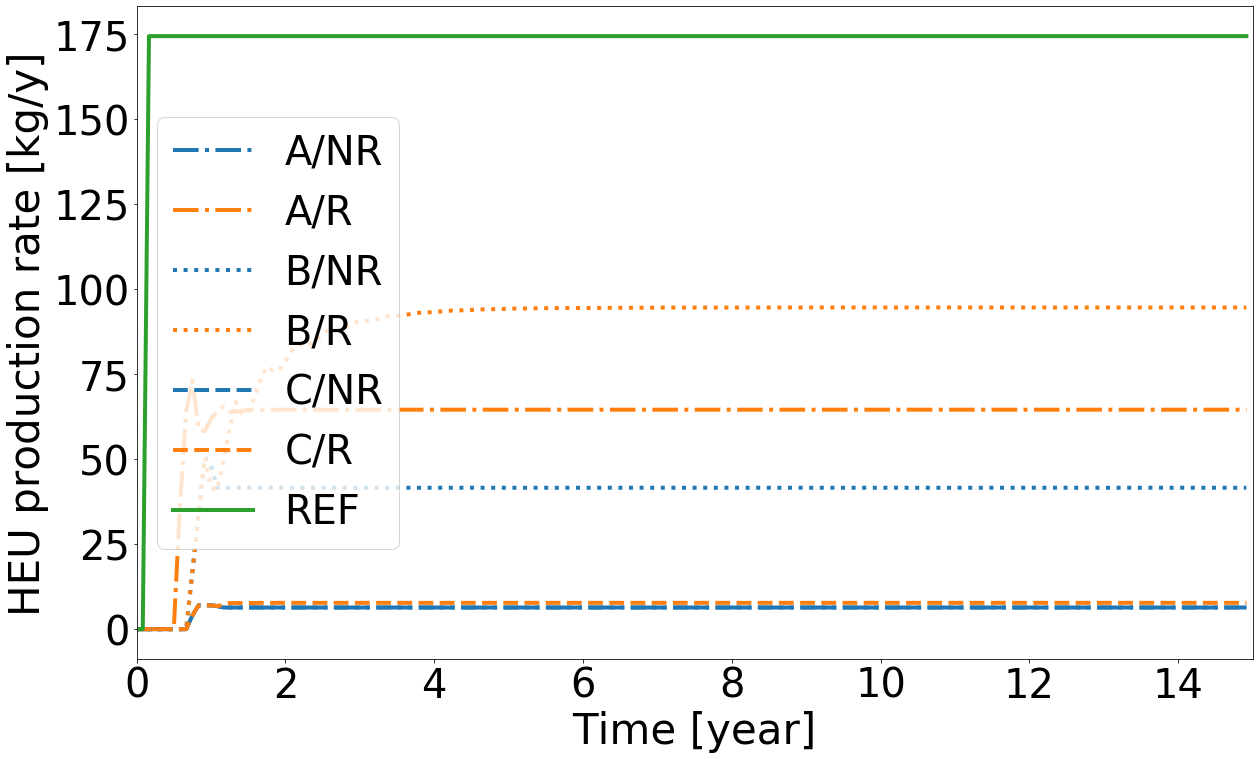

In [6]:
files = ['case_1/NR_25_3_1_1.sqlite',
         'case_1/R_25_4_1.sqlite',
         'case_2/NR_25_3_1_1.sqlite',
         'case_2/R_24_4_1_1.sqlite',
         'case_3/NR_25_3_1_1.sqlite',
         'case_3/R_25_3_1_1.sqlite',
         'ref/ref.sqlite']
invs = ['storage_3',
        'storage_2',
        'storage_3',
        'storage_3',
        'storage_3',
        'storage_3',
        'storage']

c_names = ['A/NR','A/R','B/NR','B/R','C/NR','C/R','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []
style = ['-.', '-.', ':', ':', '--','--','-']
color = ['C0', 'C1', 'C0', 'C1', 'C0','C1','C2']


for i in range(7):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    #df_ = tm.inventories(ev_, [invs[i]])
    #df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    
    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_[c_names[i]] *= 12
    df_['Time'] *= 1/12.
    
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], "\n ", df_.tail(1), "\n\n")
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU production rate [kg/y]", linestyle=style, color=color, mk="", lw=4 )
plt.xlabel('Time [year]')

x = np.arange(0, 16, 1);
plt.xlim(0,15)


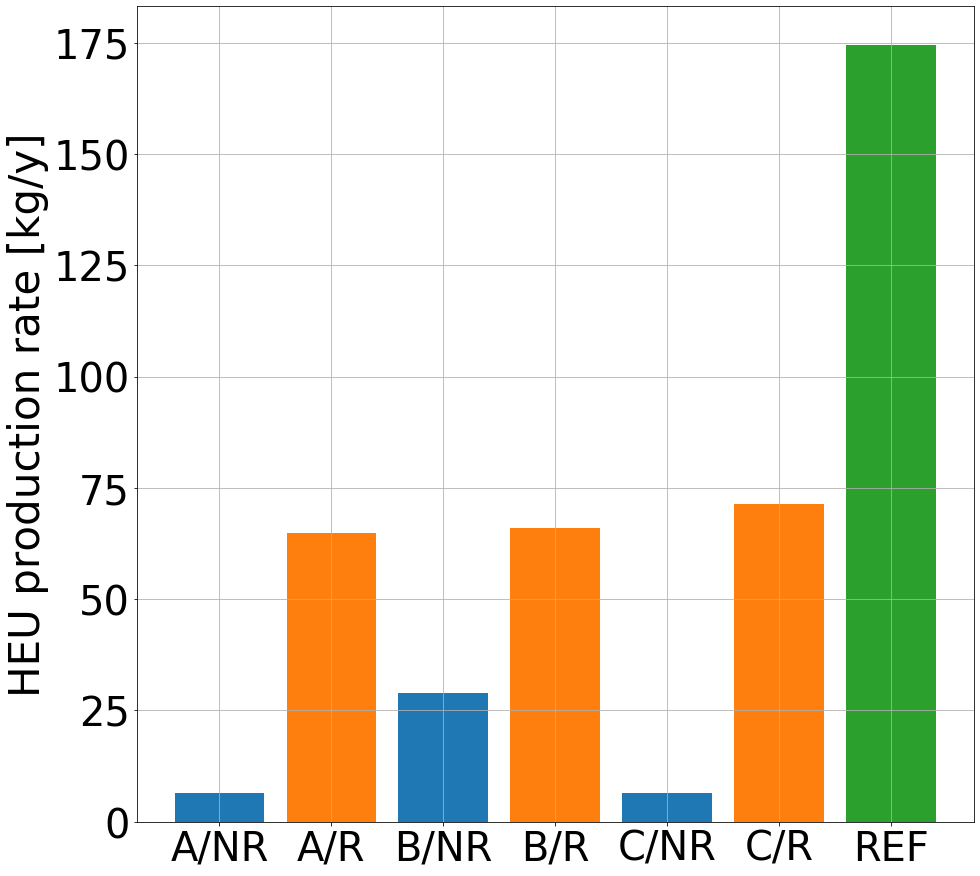

In [3]:

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15)

#old_data = (1.887142, 19.129037, 16.94547, 38.278425, 1.887142, 19.129037, 51.677497)
# Collected manually from above
data = (6.408032,64.955078,28.92795,65.908707,6.408032,71.318676,174.410434)
ind =np.arange(len(data))
plt.bar(ind, data, align='center', color=color )
plt.xticks(ind, c_names)
plt.ylabel('HEU production rate [kg/y]')
plt.grid()
plt.savefig("HEU_prod_rate.png")

A/NR/25/3/1/1             Time  A/NR/25/3/1/1
179  14.916667        0.98233 

A/R/25/4/1             Time  A/R/25/4/1
179  14.916667    0.944593 

B/NR/23/5/1/1             Time  B/NR/23/5/1/1
179  14.916667       0.903884 

B/R/24/4/1/1             Time  B/R/24/4/1/1
179  14.916667      0.949755 

C/NR/25/3/1/1             Time  C/NR/25/3/1/1
179  14.916667       0.903884 

C/R/25/3/1/1             Time  C/R/25/3/1/1
179  14.916667      0.968191 

REF             Time       REF
179  14.916667  0.903485 



(0.75, 1)

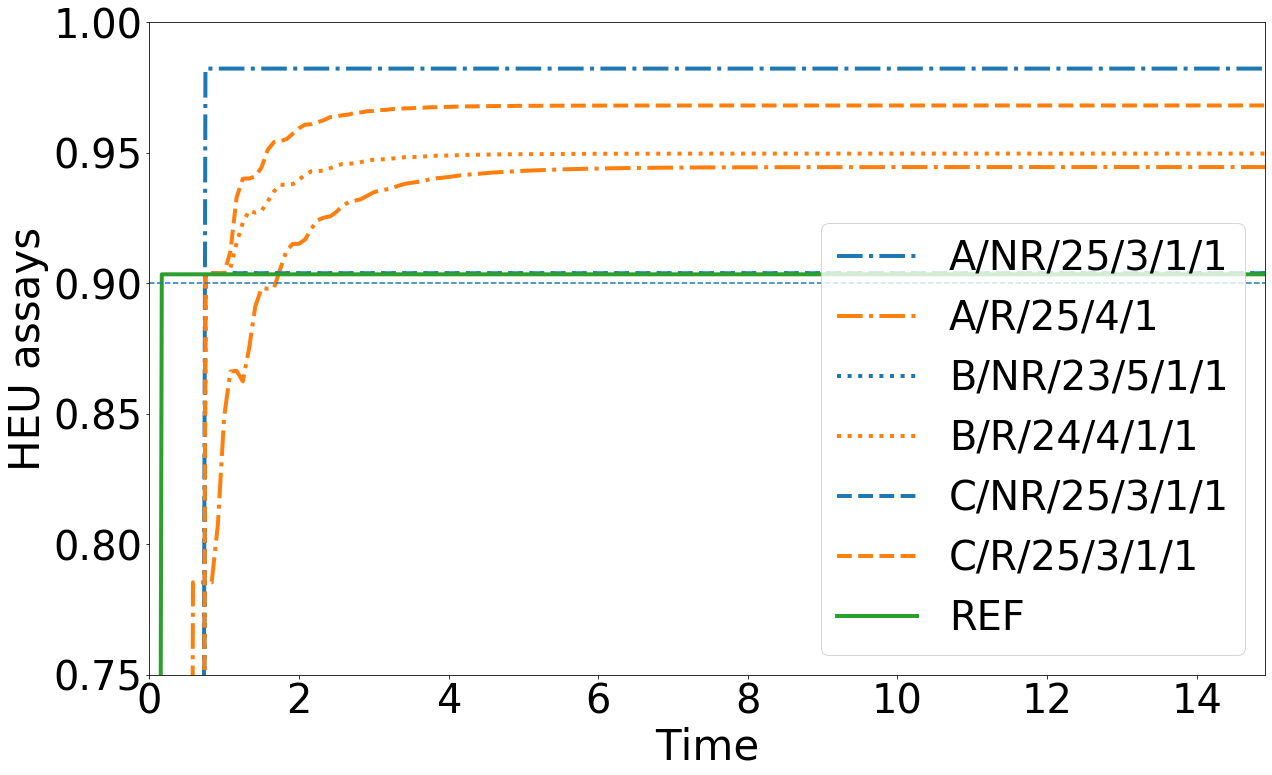

In [5]:
files = ['case_1/NR_25_3_1_1.sqlite',
         'case_1/R_25_4_1.sqlite',
         'case_2/NR_25_3_1_1.sqlite',
         'case_2/R_24_4_1_1.sqlite',
         'case_3/NR_25_3_1_1.sqlite',
         'case_3/R_25_3_1_1.sqlite',
         'ref/ref.sqlite']
receivers = ['storage_3',
        'storage_2',
        'storage_3',
        'storage_3',
        'storage_3',
        'storage_3',
        'storage']
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6
style = ['-.', '-.', ':', ':', '--','--','-']
color = ['C0', 'C1', 'C0', 'C1', 'C0','C1','C2']

c_names = ['A/NR/25/3/1/1','A/R/25/4/1','B/NR/23/5/1/1','B/R/24/4/1/1','C/NR/25/3/1/1','C/R/25/3/1/1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(7):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)
    df_ = cyh.TransFrac(ev=ev_, rec=[receivers[i]],  nucs1=nucs1, nucs2=nucs2, factor1=uma_238u, factor2=uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
 
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    print(c_names[i], " ", df_.tail(1), "\n")

pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "HEU assays", linestyle=style, color=color, mk="", lw=4  )
plt.axhline(y=0.9, linestyle="--")

x = np.arange(0, 16, 1);
plt.ylim(0.75,1)